<a href="https://colab.research.google.com/github/lankan01/cheminfor_projects/blob/main/predicting_solubility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cheminformatics in Python: Predicting Solubility of Molecules**

Author: [Jega Pradeeba](https://github.com/lankan01)

This project was inspired by the work of Chanin Nantasenamat and by the work by John S. Delaney from the book **Deep Learning for the Life Sciences: Applying Deep Learning to Genomics, Microscopy, Drug Discovery and More**

I completed this as an introduction to the application of programming and data science techniques in the context of the life science industry.

## **1. Install rdkit**
RDKit is an open-source toolkit used for chemical analysis, especially in fields like drug discovery. It offers various features for handling chemical data, such as molecule analysis and processing. Known for its strong performance in molecular modeling and chemistry-focused machine learning, RDKit is essential for cheminformatics.


In [ ]:

! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-12-14 09:26:30--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M   171MB/s    in 0.5s    

2023-12-14 09:26:30 (171 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
 

## **2. Delaney's solubility dataset**

The dataset for this project is taken from the [ESOL paper by Delaney](https://pubs.acs.org/doi/10.1021/ci034243x).

The 2004 paper details a straightforward technique, ESOL (Estimated SOLubility), for predicting a compound's water solubility using its structure. Developed through linear regression analysis of nearly 2900 compounds, it considers key properties like logPoctanol, molecular weight, aromatic content, and flexibility. This model effectively estimates solubility, competing well with more complex solubility equations.

### **2.1. Download the dataset**

In [1]:
! wget https://raw.githubusercontent.com/dataprofessor/data/master/delaney.csv

--2024-01-16 07:35:11--  https://raw.githubusercontent.com/dataprofessor/data/master/delaney.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58889 (58K) [text/plain]
Saving to: ‘delaney.csv’

delaney.csv         100%[===================>]  57.51K  --.-KB/s    in 0.01s   

2024-01-16 07:35:11 (5.31 MB/s) - ‘delaney.csv’ saved [58889/58889]



### **2.2. Read in the dataset**

In [2]:
import pandas as pd

In [3]:
sol = pd.read_csv('delaney.csv')
sol

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O


### **2.3. Examining the SMILES data**

Chemical structures are encoded by a string of text known as **SMILES** which is an acronym for **Simplified Molecular-Input Line-Entry System**.

In [4]:
sol.SMILES

0                                    ClCC(Cl)(Cl)Cl
1                                      CC(Cl)(Cl)Cl
2                                    ClC(Cl)C(Cl)Cl
3                                        ClCC(Cl)Cl
4                               FC(F)(Cl)C(F)(Cl)Cl
                           ...                     
1139                   CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140          CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141         CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O 
1142    Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O
1143                         CNC(=O)Oc1cc(C)cc(C)c1
Name: SMILES, Length: 1144, dtype: object

The first element from the **SMILES** column of the **sol** dataframe.

In [6]:
sol.SMILES[0]

'ClCC(Cl)(Cl)Cl'

### **2.4. Convert a molecule from the SMILES string to an rdkit object**

In [8]:
# !pip install rdkit ## run this its unable to find rdkit - maybe due to not setting up environs correctly
from rdkit import Chem


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 13.1 MB/s eta 0:00:00


Visualise the first molecule with the following:

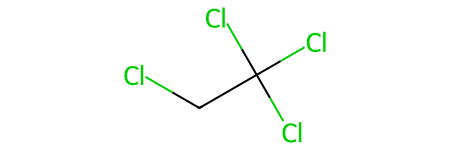

In [10]:
Chem.MolFromSmiles(sol.SMILES[0])

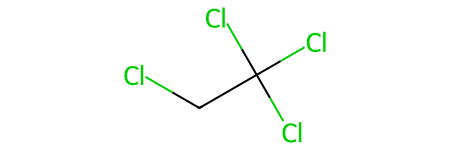

In [9]:
Chem.MolFromSmiles('ClCC(Cl)(Cl)Cl')

### **2.5. Working with rdkit object**

Get the number of atoms of a molecule:

In [11]:
m = Chem.MolFromSmiles('ClCC(Cl)(Cl)Cl')

In [12]:
m.GetNumAtoms()

6

## **3. Calculate molecular descriptors in rdkit**

### **3.1. Convert list of molecules to rdkit object**

Convert all the molecules in our data into an rdkit object for further manipulation

In [13]:
from rdkit import Chem

In [36]:
mol_list = [Chem.MolFromSmiles(element) for element in sol.SMILES]

In [37]:
len(mol_list)

1144

This is what they look like (top 5)

In [38]:
mol_list[:5]

### **3.2. Calculate molecular descriptors**

To predict **LogS** (log of the aqueous solubility), the study by Delaney makes use of 4 molecular descriptors:
1. **cLogP** *(Octanol-water partition coefficient)* - essentially the degree to which a cmp id hydrophobic vs hydrophilic
2. **MW** *(Molecular weight)* - sum of individual atomic weights
3. **RB** *(Number of rotatable bonds)* - molecules with large number of RB tend to be larger and more flexible which impacts their solubility
4. **AP** *(Aromatic proportion = number of aromatic atoms / total number of heavy atoms)*

Rdkit readily computes the first 3. As for the AP descriptor, we will calculate this by manually computing the ratio of the *number of aromatic atoms* to the *total number of heavy atoms* which rdkit can compute.

#### **3.2.1. LogP, MW and RB**

In [17]:
import numpy as np
from rdkit.Chem import Descriptors

NumPy is a fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

This function below will generate a table for our molecules consisting of the descriptors LogP, MW and RB

In [39]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def generate(smiles, verbose=False):

    moldata = []
    # convert each smiles txt into an rdkit object and append to list
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem)
        moldata.append(mol)

    # init an empty table for baseData
    baseData = np.arange(1,1)
    i = 0

    for mol in moldata:
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_MolWt = Descriptors.MolWt(mol)
        desc_NumRotatableBonds = Descriptors.NumRotatableBonds(mol)

        # each row in our table will include the 3 descriptors we want
        row = np.array([desc_MolLogP,
                        desc_MolWt,
                        desc_NumRotatableBonds])

        if(i==0):
            baseData=row
        else:
            # vertically stack the rows so it looks like a table
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MolLogP","MolWt","NumRotatableBonds"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [40]:
df = generate(sol.SMILES)
df

,MolLogP,MolWt,NumRotatableBonds
0,2.59540,167.850,0.0
1,2.37650,133.405,0.0
2,2.59380,167.850,1.0
3,2.02890,133.405,1.0
4,2.91890,187.375,1.0
...,...,...,...
1139,1.98820,287.343,8.0
1140,3.42130,286.114,2.0
1141,3.60960,308.333,4.0
1142,2.56214,354.815,3.0


#### **3.2.2. Aromatic proportion**

##### 3.2.1.1. Number of aromatic atoms

Here, we will create a custom function to calculate the **Number of aromatic atoms**. With this descriptor we can use it to subsequently calculate the AP descriptor.

 (Aromatic proportion = number of aromatic atoms / total number of heavy atoms)

Exampel for computing for a single molecule.

In [45]:
m = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')

In [46]:
aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
aromatic_atoms

[False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True]

Identifying and counting the number of atoms within the molecule that are part of an aromatic system, returning the total count of such aromatic atoms.



In [47]:
def AromaticAtoms(m):
  aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
  aa_count = []
  for i in aromatic_atoms:
    if i==True:
      aa_count.append(1)
  sum_aa_count = sum(aa_count)
  return sum_aa_count

In [34]:
AromaticAtoms(m)

19

Computing for molecules in the entire dataset (mol_list)

In [84]:
%%capture
desc_AromaticAtoms = [AromaticAtoms(element) for element in mol_list]
desc_AromaticAtoms

##### 3.2.1.2. **Number of heavy atoms**

Here, we will use an existing function for calculating the Number of heavy atoms.

Computing for a single molecule.

In [42]:
m = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
Descriptors.HeavyAtomCount(m)

34

Computing for molecules in the entire dataset.

In [83]:
%%capture
desc_HeavyAtomCount = [Descriptors.HeavyAtomCount(element) for element in mol_list]
desc_HeavyAtomCount

##### **3.2.1.3. Computing the Aromatic Proportion (AP) descriptor**

Computing for a single molecule.

In [49]:
m = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
AromaticAtoms(m)/Descriptors.HeavyAtomCount(m)

0.5588235294117647

Computing for molecules in the entire dataset.

In [82]:
%%capture
desc_AromaticProportion = [AromaticAtoms(element)/Descriptors.HeavyAtomCount(element) for element in mol_list]
desc_AromaticProportion


In [51]:
df_desc_AromaticProportion = pd.DataFrame(desc_AromaticProportion, columns=['AromaticProportion'])
df_desc_AromaticProportion

,AromaticProportion
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
1139,0.000000
1140,0.333333
1141,0.695652
1142,0.521739


### **3.3. X matrix (Combining all computed descriptors into 1 dataframe)**

In [52]:
df

,MolLogP,MolWt,NumRotatableBonds
0,2.59540,167.850,0.0
1,2.37650,133.405,0.0
2,2.59380,167.850,1.0
3,2.02890,133.405,1.0
4,2.91890,187.375,1.0
...,...,...,...
1139,1.98820,287.343,8.0
1140,3.42130,286.114,2.0
1141,3.60960,308.333,4.0
1142,2.56214,354.815,3.0


In [53]:
df_desc_AromaticProportion

,AromaticProportion
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
1139,0.000000
1140,0.333333
1141,0.695652
1142,0.521739


Let's combine the 2 dataframes to produce the **X** matrix

In [55]:
X = pd.concat([df,df_desc_AromaticProportion], axis = 1) # axis=1 to put them side by side
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


now we have what we need to predict the y matrix - the solubility of the molecule

### **3.4. Y matrix**

In [56]:
sol.head()

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.077,FC(F)(Cl)C(F)(Cl)Cl


Assigning the second column (index 1) to the Y matrix

In [57]:
Y = sol.iloc[:,1]
Y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: measured log(solubility:mol/L), Length: 1144, dtype: float64

---

## **Data split**

In [58]:
from sklearn.model_selection import train_test_split

In [60]:
# Split the dataset into training and testing sets: 80% for training and 20% for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## **Linear Regression Model**

Our model will be a simple linear regression model

In [61]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

### **Predicts the X_train**

In [63]:
Y_pred_train = model.predict(X_train)

In [64]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Coefficients: [-0.74139571 -0.00689217  0.01754473 -0.40114837]
Intercept: 0.2867307424163785
Mean squared error (MSE): 1.02
Coefficient of determination (R^2): 0.77


### **Predicts the X_test**

In [65]:
Y_pred_test = model.predict(X_test)

In [66]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Coefficients: [-0.74139571 -0.00689217  0.01754473 -0.40114837]
Intercept: 0.2867307424163785
Mean squared error (MSE): 0.98
Coefficient of determination (R^2): 0.78


### **Linear Regression Equation**

The work of Delaney$^1$ provided the following linear regression equation:

> LogS = 0.16 -  0.63 cLogP - 0.0062 MW + 0.066 RB - 0.74 AP

The reproduction by Pat Walters$^2$ provided the following:

> LogS = 0.26 -  0.74 LogP - 0.0066 MW + 0.0034 RB - 0.42 AP



#### **Our linear regression equation**

In [67]:
print('LogS = %.2f %.2f LogP %.4f MW %.4f RB %.2f AP' % (model.intercept_, model.coef_[0], model.coef_[1], model.coef_[2], model.coef_[3] ) )

LogS = 0.29 -0.74 LogP -0.0069 MW 0.0175 RB -0.40 AP


The same equation can also be produced with the following code (which breaks up the previous one-line code into several comprehensible lines.

In [68]:
yintercept = '%.2f' % model.intercept_
LogP = '%.2f LogP' % model.coef_[0]
MW = '%.4f MW' % model.coef_[1]
RB = '%.4f RB' % model.coef_[2]
AP = '%.2f AP' % model.coef_[3]

In [69]:
print('LogS = ' +
      ' ' +
      yintercept +
      ' ' +
      LogP +
      ' ' +
      MW +
      ' ' +
      RB +
      ' ' +
      AP)

LogS =  0.29 -0.74 LogP -0.0069 MW 0.0175 RB -0.40 AP


So our model gives:

LogS =  0.29 -0.74 LogP -0.0069 MW + 0.0175 RB -0.40 AP

vs
[Pat Walters]((https://practicalcheminformatics.blogspot.com/2018/09/predicting-aqueous-solubility-its.html):

LogS = 0.26 - 0.74 LogP - 0.0066 MW + 0.0034 RB - 0.42 AP

vs
Delaney:

LogS = 0.16 - 0.63 cLogP - 0.0062 MW + 0.066 RB - 0.74 AP




#### **Use entire dataset for model training (For Comparison)**

In [70]:
full = linear_model.LinearRegression()
full.fit(X, Y)

LinearRegression()

In [71]:
full_pred = model.predict(X)

In [72]:
print('Coefficients:', full.coef_)
print('Intercept:', full.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, full_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, full_pred))

Coefficients: [-0.74173609 -0.00659927  0.00320051 -0.42316387]
Intercept: 0.2565006830997185
Mean squared error (MSE): 1.01
Coefficient of determination (R^2): 0.77


In [73]:
full_yintercept = '%.2f' % full.intercept_
full_LogP = '%.2f LogP' % full.coef_[0]
full_MW = '%.4f MW' % full.coef_[1]
full_RB = '+ %.4f RB' % full.coef_[2]
full_AP = '%.2f AP' % full.coef_[3]

In [74]:
print('LogS = ' +
      ' ' +
      full_yintercept +
      ' ' +
      full_LogP +
      ' ' +
      full_MW +
      ' ' +
      full_RB +
      ' ' +
      full_AP)

LogS =  0.26 -0.74 LogP -0.0066 MW + 0.0032 RB -0.42 AP


## **Scatter plot of experimental vs. predicted LogS**

In [75]:
import matplotlib.pyplot as plt

### **Quick check of the variable dimensions of Train and Test sets**

In [76]:
Y_train.shape, Y_pred_train.shape

((915,), (915,))

In [77]:
Y_test.shape, Y_pred_test.shape

((229,), (229,))

### **Horizontal plot**

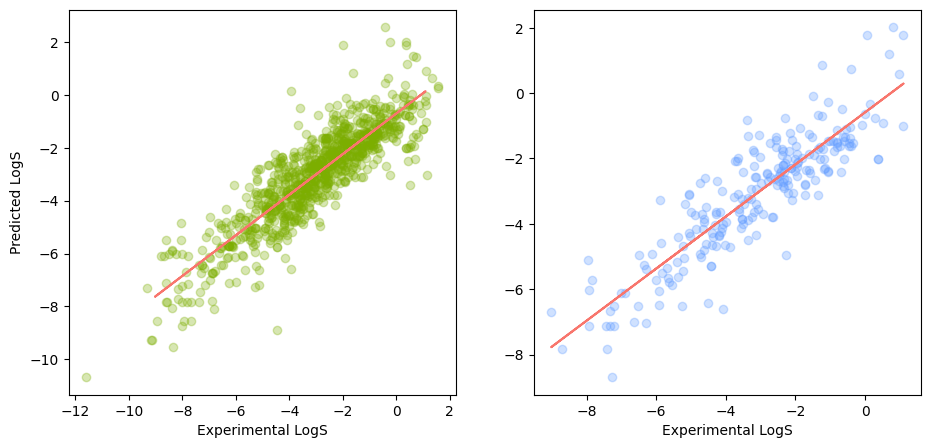

In [79]:
plt.figure(figsize=(11,5))

# 1 row, 2 column, plot 1
plt.subplot(1, 2, 1)
plt.scatter(x=Y_train, y=Y_pred_train, c="#7CAE00", alpha=0.3)

z = np.polyfit(Y_train, Y_pred_train, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')

# 1 row, 2 column, plot 2
plt.subplot(1, 2, 2)
plt.scatter(x=Y_test, y=Y_pred_test, c="#619CFF", alpha=0.3)

z = np.polyfit(Y_test, Y_pred_test, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.xlabel('Experimental LogS')

plt.savefig('plot_horizontal_logS.png')
plt.savefig('plot_horizontal_logS.pdf')
plt.show()

## Evaluating the plots

The left subplot compares actual vs. predicted LogS for training data, and the right subplot does the same for test data, both showing linear regression lines to assess model fit and generalization.

- The model shows a good fit for the training data with a tighter clustering around the best-fit line, indicating accurate predictions within the scope of the data it was trained on.

- Nonetheless, the test data does show more spread around the best-fit line / looser clustering, suggesting the model's predictions are less precise when encountering new data.

- The observed variation may come from the model overfitting to the training data or the inherent diversity and complexity within the test dataset that wasn't captured during training.

- Enhancements to the model could include cross-validation to ensure it generalizes well, regularisation to prevent overfitting, and possibly expanding the training data to encompass a broader variety of data points.

- Exploring feature engineering to better capture the underlying data patterns or tweaking hyperparameters could also contribute to a more robust model performance.



---

## **Reference**

1. John S. Delaney. [ESOL:  Estimating Aqueous Solubility Directly from Molecular Structure](https://pubs.acs.org/doi/10.1021/ci034243x). ***J. Chem. Inf. Comput. Sci.*** 2004, 44, 3, 1000-1005.

2. Pat Walters. [Predicting Aqueous Solubility - It's Harder Than It Looks](http://practicalcheminformatics.blogspot.com/2018/09/predicting-aqueous-solubility-its.html). ***Practical Cheminformatics Blog***

3. Bharath Ramsundar, Peter Eastman, Patrick Walters, and Vijay Pande. [Deep Learning for the Life Sciences: Applying Deep Learning to Genomics, Microscopy, Drug Discovery, and More](https://learning.oreilly.com/library/view/deep-learning-for/9781492039822/), O'Reilly, 2019.

4. [Supplementary file](https://pubs.acs.org/doi/10.1021/ci034243x) from Delaney's ESOL:  Estimating Aqueous Solubility Directly from Molecular Structure.